In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [37]:
import cv2
import numpy as np
import os
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util


In [44]:
import random
import os

# our folder path containing some images
folder_path = 'C:/Web_Scrapping/fliprobo assignment 2/Train/jeans/'
# the number of file to generate
#num_files_desired = 80

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]



In [67]:

for i in images:
    img = cv2.imread(str(i))
    height,width=img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),30,.75)
    rotation_matrixn = cv2.getRotationMatrix2D((width/2,height/2),-30,.75)
    ratated_image = cv2.warpAffine(img,rotation_matrix,(width,height))
    rotated_imagen = cv2.warpAffine(img,rotation_matrixn,(width,height))
    flip=cv2.flip(img,-1)
    M=np.ones(img.shape,dtype='uint8')*75
    added=cv2.add(img,M)
    substracted=cv2.subtract(img,M)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened=cv2.filter2D(img,-1,kernel)
    
    
    cv2.imwrite(i+'Augmented 30.jpeg',ratated_image)
    cv2.imwrite(i+'Augmented_30.jpeg',rotated_imagen)
    cv2.imwrite(i+'Flipped.jpeg',flip)
    cv2.imwrite(i+'high.jpeg',added)
    cv2.imwrite(i+'low.jpeg',substracted)
    cv2.imwrite(i+'ImageSharpening.jpeg',sharpened)
    

In [62]:
folder_place = 'C:/Web_Scrapping/fliprobo assignment 2/Train/trousers/'

In [65]:
image = [os.path.join(folder_place, f) for f in os.listdir(folder_place) if os.path.isfile(os.path.join(folder_place, f))]

In [66]:
for i in image:
    imgT = cv2.imread(str(i))
    height,width=imgT.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),30,.75)
    rotation_matrixn = cv2.getRotationMatrix2D((width/2,height/2),-30,.75)
    ratated_image = cv2.warpAffine(imgT,rotation_matrix,(width,height))
    rotated_imagen = cv2.warpAffine(imgT,rotation_matrixn,(width,height))
    flip=cv2.flip(imgT,-1)
    M=np.ones(imgT.shape,dtype='uint8')*75
    added=cv2.add(imgT,M)
    substracted=cv2.subtract(imgT,M)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened=cv2.filter2D(imgT,-1,kernel)
    
    
    cv2.imwrite(i+'Augmented 30.jpeg',ratated_image)
    cv2.imwrite(i+'Augmented_30.jpeg',rotated_imagen)
    cv2.imwrite(i+'Flipped.jpeg',flip)
    cv2.imwrite(i+'high.jpeg',added)
    cv2.imwrite(i+'low.jpeg',substracted)
    cv2.imwrite(i+'ImageSharpening.jpeg',sharpened)
    


In [83]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [129]:
img_width, img_height = 224, 224
  
train_data_dir = 'C:/Web_Scrapping/fliprobo assignment 2/Train'
validation_data_dir = 'C:/Web_Scrapping/fliprobo assignment 2/Test'
nb_train_samples = 560
nb_validation_samples = 20
epochs = 10
batch_size = 16

In [130]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [131]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [132]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [133]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

In [134]:
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

In [135]:
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  


Found 560 images belonging to 2 classes.


In [136]:
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 40 images belonging to 2 classes.


In [137]:
model_save = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs, validation_data = validation_generator, 
        validation_steps = nb_validation_samples // batch_size) 
  

Epoch 1/10
35/35 [==============================] - 31s 873ms/step - loss: 0.8158 - accuracy: 0.5554 - val_loss: 0.6233 - val_accuracy: 0.6875
Epoch 2/10
35/35 [==============================] - 29s 833ms/step - loss: 0.6080 - accuracy: 0.6696 - val_loss: 0.5455 - val_accuracy: 0.7500
Epoch 3/10
35/35 [==============================] - 30s 849ms/step - loss: 0.5729 - accuracy: 0.7250 - val_loss: 0.4753 - val_accuracy: 0.7500
Epoch 4/10
35/35 [==============================] - 29s 842ms/step - loss: 0.4787 - accuracy: 0.7946 - val_loss: 0.6128 - val_accuracy: 0.7500
Epoch 5/10
35/35 [==============================] - 29s 827ms/step - loss: 0.4407 - accuracy: 0.8036 - val_loss: 0.3232 - val_accuracy: 0.8750
Epoch 6/10
35/35 [==============================] - 30s 850ms/step - loss: 0.4077 - accuracy: 0.8107 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 7/10
35/35 [==============================] - 30s 868ms/step - loss: 0.3806 - accuracy: 0.8268 - val_loss: 0.3799 - val_accuracy: 0.7500

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


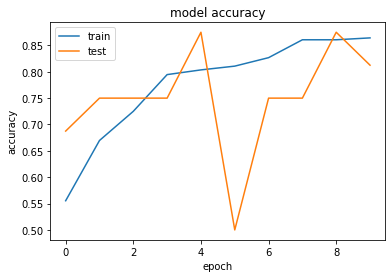

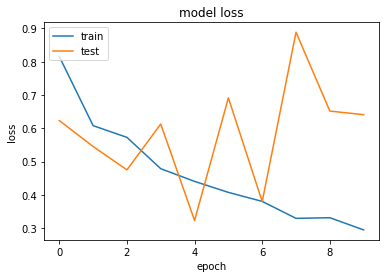

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(model_save.history.keys())
# summarize history for accuracy
plt.plot(model_save.history['accuracy'])
plt.plot(model_save.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_save.history['loss'])
plt.plot(model_save.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [139]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()


16
1.0


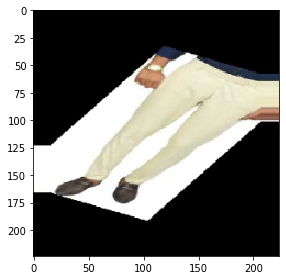

1.0


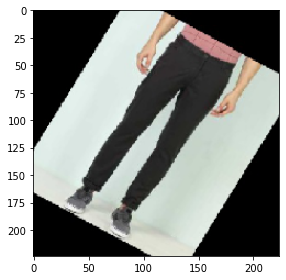

0.0


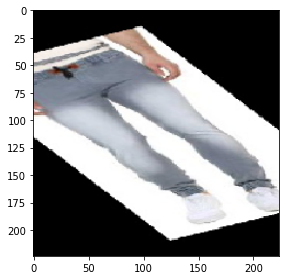

0.0


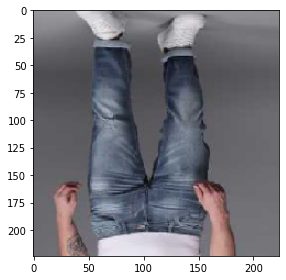

1.0


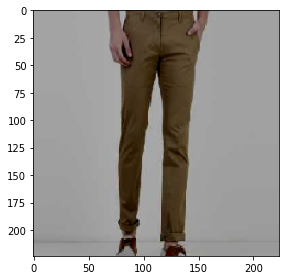

1.0


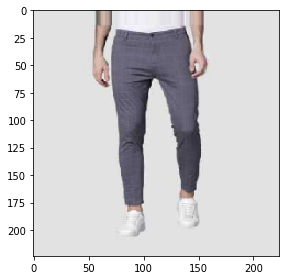

1.0


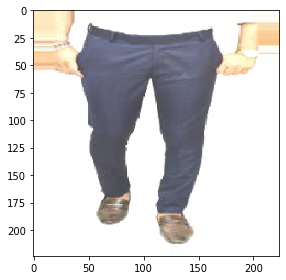

1.0


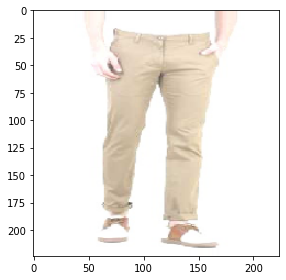

1.0


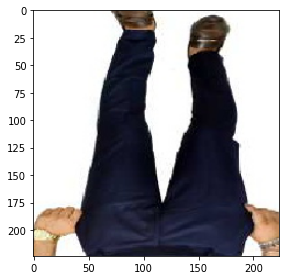

0.0


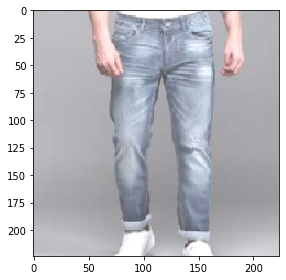

0.0


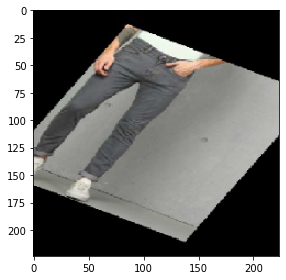

0.0


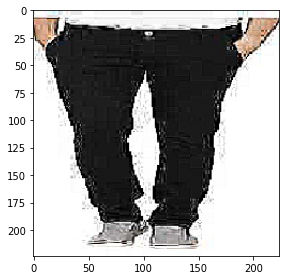

0.0


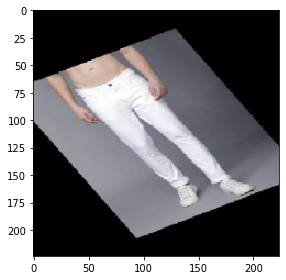

1.0


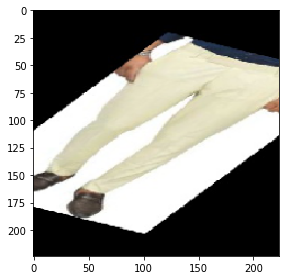

0.0


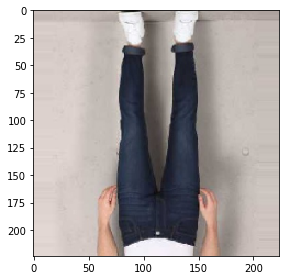

0.0


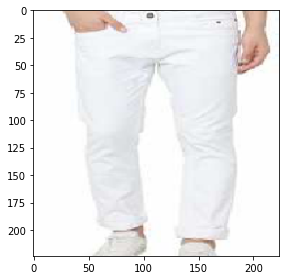

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [141]:
from os import listdir
from os.path import isfile, join
predict_dir_path='C:/Web_Scrapping/fliprobo assignment 2/Test_perdict/'
output_files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(output_files)

['img_318.jpeg', 'img_335.jpeg', 'img_39.jpeg', 'img_426.jpeg', 'img_439.jpeg', 'img_512.jpeg', 'img_52.jpeg', 'img_526.jpeg', 'img_527.jpeg', 'img_53.jpeg']


In [148]:
import numpy as np
from keras.preprocessing import image
jean_counter = 0 
trouser_counter  = 0
for file in output_files:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 1:
        print(file + ": " + 'trouser')
        trouser_counter += 1
    else:
        print(file + ": " + 'jeans')
        jean_counter += 1
print("Total trousers :", trouser_counter)
print("Total jeans :",jean_counter)

img_318.jpeg: trouser
img_335.jpeg: trouser
img_39.jpeg: trouser
img_426.jpeg: jeans
img_439.jpeg: jeans
img_512.jpeg: trouser
img_52.jpeg: trouser
img_526.jpeg: trouser
img_527.jpeg: trouser
img_53.jpeg: trouser
Total trousers : 8
Total jeans : 2


In [150]:
model.save_weights('model_saved.h7') 